In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyemma.plots as mplt

In [18]:
loaded_CG_projection = np.load('')

In [19]:
number_bins = 60
amount_of_bm_points = 50

In [20]:
histo, xedges, yedges = np.histogram2d(loaded_CG_projection[:,0], 
                                       loaded_CG_projection[:,1], 
                                       bins=number_bins)

lst_bin_population = []
for index,population_row in enumerate(histo):
    for individual_population in population_row:
        lst_bin_population.append(individual_population)
lst_bin_population = np.array(lst_bin_population)
    

indices_of_largest_histos = lst_bin_population.argsort()[-len(lst_bin_population):][::-1]
    
lst_bins_for_backmapping = []
for index in indices_of_largest_histos:
    percentage_of_conformations_in_bin = round(lst_bin_population[index]/(sum(lst_bin_population)), 4)
    number_of_confs_in_current_bin = int(round(percentage_of_conformations_in_bin*amount_of_bm_points))
    if number_of_confs_in_current_bin >= 1:
        for conf in range(number_of_confs_in_current_bin):
            if len(lst_bins_for_backmapping) < amount_of_bm_points:
                lst_bins_for_backmapping.append(index)
    else:
        if len(lst_bins_for_backmapping) < amount_of_bm_points:
            lst_bins_for_backmapping.append(index)
    

indices_of_minima_focused_starting_structures = []

count_candidates = 0
lst_candidates = []

for index_sorted_bin,sorted_bin in enumerate(lst_bins_for_backmapping):
    
    bin_number = sorted_bin+1
    row_index = int(np.math.ceil((float(bin_number)/float(number_bins))))-1
    column_index = bin_number-((row_index)*number_bins)-1

    x_range = [xedges[row_index], xedges[row_index+1]]
    y_range = [yedges[column_index], yedges[column_index+1]]
    
    while count_candidates==len(indices_of_minima_focused_starting_structures):
        random_index = np.random.randint(0,len(loaded_CG_projection))
        data_point_projection = loaded_CG_projection[random_index]
        if data_point_projection[0]>x_range[0]:
            if data_point_projection[0]<x_range[1]:
                if data_point_projection[1]>y_range[0]:
                    if data_point_projection[1]<y_range[1]:
                        indices_of_minima_focused_starting_structures.append(random_index)

    count_candidates+=1

In [21]:
lst_BM_projections = []

for index in indices_of_minima_focused_starting_structures:
    lst_BM_projections.append(loaded_CG_projection[index])

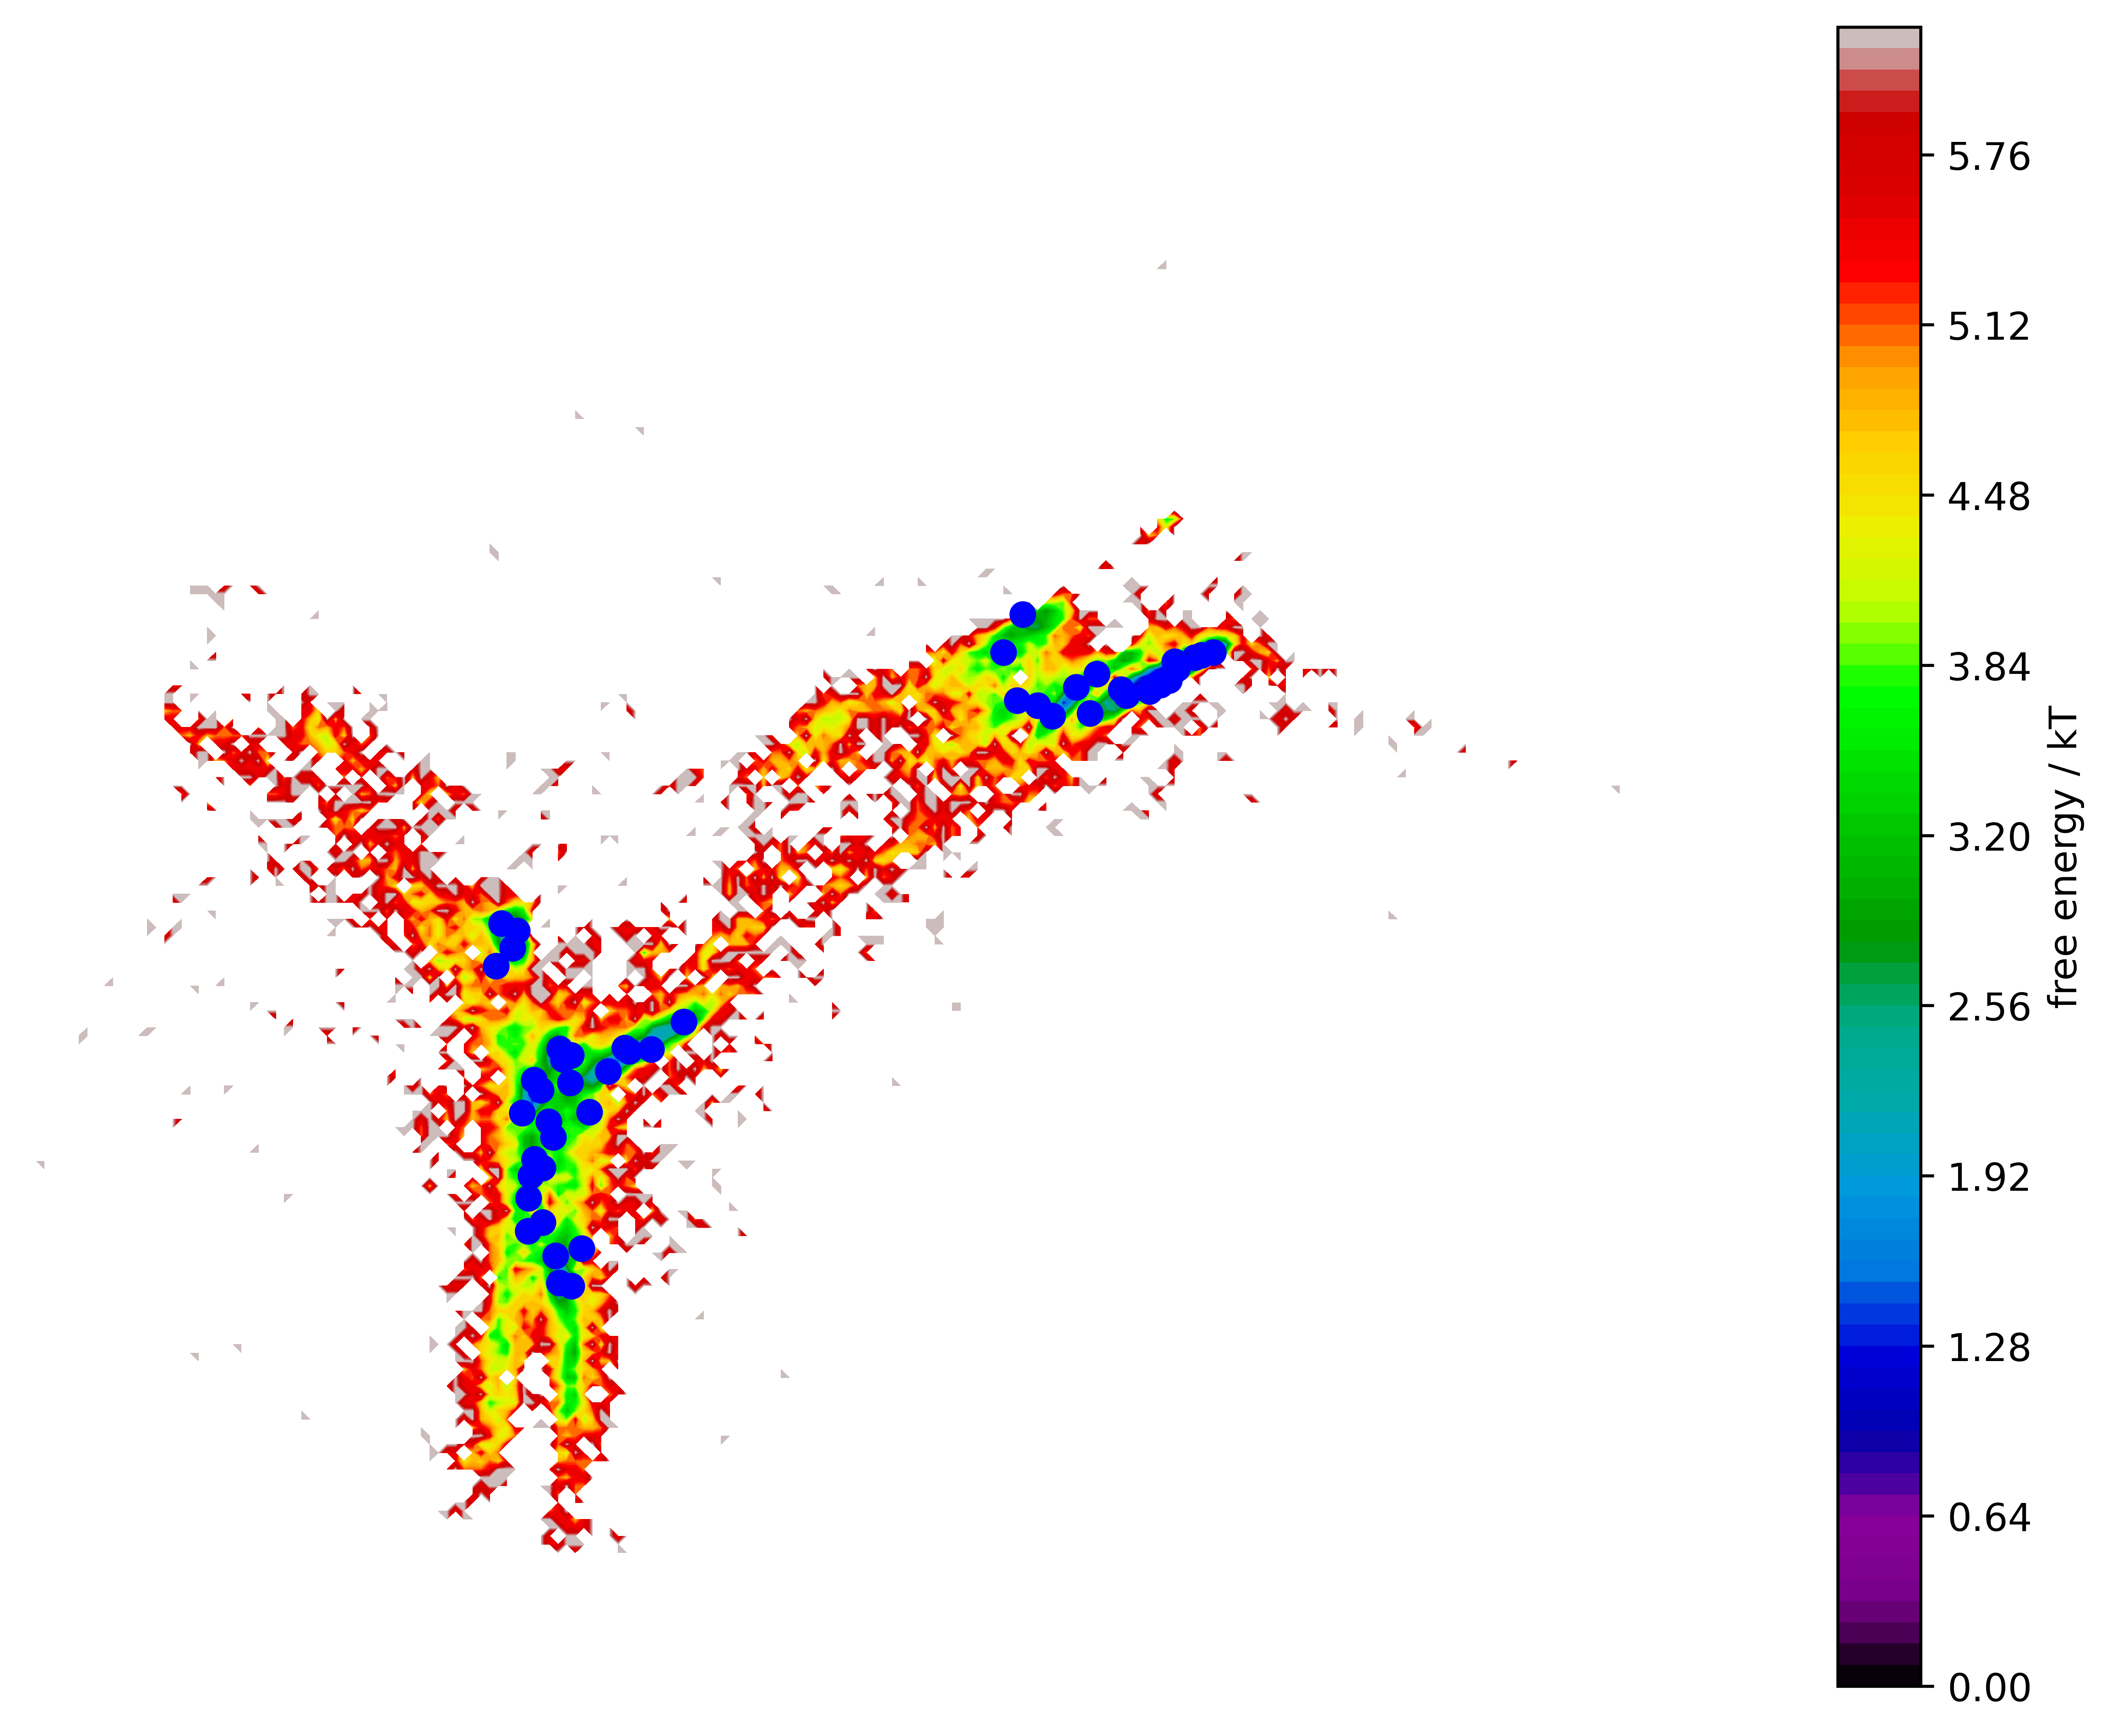

In [22]:
fig = plt.figure(figsize=(10, 8), dpi=300)

ax = fig.add_subplot(1, 1, 1)

ax.set_facecolor("white")

ax.axis('off')

mplt.plot_free_energy(loaded_CG_projection[:,0],
                      loaded_CG_projection[:,1], ax=ax, 
                      cmap='nipy_spectral', ncontours=100, nbins=200)

for BM_projection in lst_BM_projections:
    plt.scatter(float(BM_projection[0]), float(BM_projection[1]), c='blue')

plt.show()

## Use libraray of choice to extract the chosen CG conformations (e.g. mdanalysis or mdtraj) and apply back-mapping routine (e.g. backwards.py for MARTINI)